
SAD - TPC 4
Aplicar Algoritmos
Usando sklearn correr os métodos Decision Tree, Random Forrest e Naive Bayes para o dataset Digits, definido em baixo;

Usar o training set para executar o treino do modelo;

Comparar o erro obtido em cada método, para o testset e para o training set e expecificar se os valores são os esperados;

Para um dos algoritmos, dar exemplos do test set de instâncias mal bem classificadas (2 de cada);

In [8]:
#Imports necessários:
from sklearn import datasets, tree, model_selection
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [6]:
#DataSet Digits:
digits = datasets.load_digits()
[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(digits.data, digits.target)

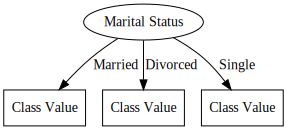

In [44]:
graph = graphviz.Digraph()
graph.node('A', 'Marital Status', shape="ellipse")
graph.node('B1', 'Class Value', shape="rectangle")
graph.node('B2', 'Class Value', shape="rectangle")
graph.node('B3', 'Class Value', shape="rectangle")
graph.edge("A", "B1", " Married")
graph.edge("A", "B2", " Divorced")
graph.edge("A", "B3", " Single")
graph

In [61]:
print("\n### Decision Trees")

dtclf = tree.DecisionTreeClassifier()
dtclf = dtclf.fit(features_train, classes_train)
print("Decision Trees Score Train: ", dtclf.score(features_train, classes_train))
print("Decision Trees Score Test : ",  dtclf.score(features_test, classes_test))

error=0.0
for i in range(1,len(classified)):
	if (classified[i] != classes_test[i]):
		error += 1.0
error /= len(classified)
print("Decision Tree Error: ", error)

# Para gerar um gráfico com a árvore:
dot_data = tree.export_graphviz(dtclf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits")


### Decision Trees
Decision Trees Score Train:  1.0
Decision Trees Score Test :  0.846666666667
Decision Tree Error:  0.9022222222222223


'digits.pdf'

In [62]:
print("\n### Random Forest")


rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf = rfclf.fit(features_train, classes_train)
print("Random Forest score train: ", rfclf.score(features_train, classes_train))
print("Random Forest score test : ", rfclf.score(features_test, classes_test))

error=0.0
for i in range(1,len(classified)):
	if (classified[i] != classes_test[i]):
		error += 1.0
error /= len(classified)
print("Random Forest error: ", error)


### Random Forest
Random Forest score train:  0.763919821826
Random Forest score test :  0.742222222222
Random Forest error:  0.9022222222222223


In [63]:
print("\n### Gaussian Naive Bayes")
gnb = GaussianNB()

[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(digits.data, digits.target)

y_pred = gnb.fit(features_train, classes_train)
score_train = gnb.score(features_train, classes_train)
score_test = gnb.score(features_test, classes_test)
print("NB score train:", score_train)
print("NB score test :", score_test)


### Gaussian Naive Bayes
NB score train: 0.837416481069
NB score test : 0.828888888889


In [64]:
#Extra:
print("\n### Logistic Regression")

locf = LogisticRegression(C=100.0)
locf.fit(features_train, classes_train)
print("Logistic Regression score train: ", locf.score(features_train, classes_train))
print("Logistic Regression score test : ", locf.score(features_test, classes_test))

error=0.0
for i in range(1,len(classified)):
	if (classified[i] != classes_test[i]):
		error += 1.0
error /= len(classified)
print("Logistic Regression error: ", error)


### Logistic Regression
Logistic Regression score train:  0.998515219005
Logistic Regression score test :  0.948888888889
Logistic Regression error:  0.9133333333333333


In [27]:
# Na maioria dos casos:
# Como a score do conjunt de treino é < 1, concluidos que  não ocorreu overfitting
#  e o modelo está bem ajustado (não demasiado específico).

# Como todos os classificadores obtêm uma score menor para o conjunto de teste, 
# conclui-se que não ocorreu underfitting, estando no modelo mais ajustado aos dados de treino do que aos novos.

# Excepto nas Decision Trees, a score de treino é 1, logo está overfitted ao treino,
# e nas Random Forests, em que a score do teste foi maior do que a do treino logo está underfitted.